### 1. Перевірка файлу transfusion.data
<p><img src="https://assets.datacamp.com/production/project_646/img/blood_donation.png" style="float: right;" alt="Піктограма мішка з кров'ю, на якій написано донорську кров" width="200"></p>
<p>Переливання крові рятує життя - від заміщення втраченої крові під час великої операції чи серйозної травми до лікування різних хвороб і розладів крові. Забезпечення достатньої кількості крові, коли це необхідно, є серйозною проблемою для медичних працівників. За даними <a href="https://www.webmd.com/a-to-z-guides/blood-transfusion-what-to-know#1">WebMD</a>, "близько 5 мільйонів американців потребують переливання крові щороку".</p>
<p>Наш набір даних отримано з мобільного автомобіля для донорства крові. Центр служби переливання крові їздить по різних університетах і збирає кров у рамках акції. Ми хочемо передбачити, чи дасть донор кров наступного разу, коли автомобіль приїде до кампусу.</p>
<p>Дані зберігаються в <code>datasets/transfusion.data</code> та структуровані відповідно до маркетингової моделі RFMTC (варіант RFM). Пізніше в цьому блокноті ми розглянемо, що це означає. Спочатку перевіримо дані.</p>


## 2. Завантаження даних про донорську кров
<p>Тепер ми знаємо, що працюємо зі звичайним файлом CSV (тобто роздільником є ​​<code>,</code> тощо). Переходимо до завантаження даних в пам'ять.</p>

In [25]:
# Import pandas
import pandas as pd

# Зчитування датасету
transfusion = pd.read_csv('D:/курсач/transfusion (2).csv')

# Роздрукуйте перші рядки нашого набору даних
transfusion.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


## 3. Перевірка Transfusion DataFrame
<p>Давайте коротко повернемося до нашого обговорення моделі RFM. RFM означає Recency, Frequency і Monetary Value і зазвичай використовується в маркетингу для визначення ваших найкращих клієнтів. У нашому випадку нашими клієнтами є донори крові.</p>
<p>RFMTC є різновидом моделі RFM. Нижче наведено опис значення кожного стовпця в нашому наборі даних:</p>
<ul>
<li>R (Останній час - місяці з моменту останньої пожертви)</li>
<li>F (Частота – загальна кількість пожертвувань)</li>
<li>M (грошовий – загальна кількість донорської крові в к.к.)</li>
<li>T (Час - місяці з моменту першої пожертви)</li>
<li>двійкова змінна, яка вказує, чи він/вона здавав кров у березні 2007 року (1 означає здачу крові; 0 означає відсутність донорства)</li>
</ul>
<p>Схоже, кожен стовпець у нашому DataFrame має числовий тип, а це саме те, що ми хочемо, створюючи модель машинного навчання. Давайте перевіримо нашу гіпотезу.</p>

In [28]:
# Надрукуйте стислий підсумок переливання DataFrame
transfusion.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [30]:
transfusion.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


## 4. Перевірка дисперсії
<p>Якщо функція в нашому наборі даних має високу дисперсію, яка на порядок або більше перевищує інші функції, це може вплинути на здатність моделі навчатися на основі інших функцій у наборі даних.</p>
<p>Коригування високої дисперсії називається нормалізацією. Це одна з можливих трансформацій, які ви виконуєте перед навчанням моделі. Давайте перевіримо дисперсію, щоб побачити, чи потрібне таке перетворення.</p>

In [52]:
# Дисперсія X_train, округлення результату до 3 знаків після коми
X_train.var().round(3)

Recency (months)              66.929
Frequency (times)             33.830
Monetary (c.c. blood)    2114363.700
Time (months)                611.147
dtype: float64

## 5. Нормалізація даних
Розбіжність <p><code>Monetary (c.c. blood)</code> є дуже високою порівняно з будь-яким іншим стовпцем у наборі даних. Це означає, що, якщо її не врахувати, ця функція може мати більшу вагу в моделі (тобто вважатися більш важливою), ніж будь-яка інша функція.</p>
<p>Один із способів виправити високу дисперсію – це нормалізація журналу.</p>

In [54]:
# Import numpy
import numpy as np

# Скопіюйте X_train і X_test в X_train_normed і X_test_normed
X_train_normed, X_test_normed = X_train.copy(), X_test.copy()

# Вкажіть, який стовпець нормалізувати
col_to_normalize = 'Monetary (c.c. blood)'

# Нормалізація журналу
for df_ in [X_train_normed, X_test_normed]:
    # Додати нормалізований стовпець журналу
    df_['monetary_log'] = np.log(df_[col_to_normalize])
    # Видалити оригінальний стовпець
    df_.drop(columns=col_to_normalize, inplace=True)

# Перевірити дисперсію для X_train_normed
X_train_normed.var().round(3)

Recency (months)      66.929
Frequency (times)     33.830
Time (months)        611.147
monetary_log           0.837
dtype: float64

## 6. Поділ набора даних для тренування та тестування
<p>Тепер ми використаємо метод <code>train_test_split()</code>, щоб розділити <code>transfusion</code> DataFrame.</p>
<p>Цільова захворюваність повідомила нам, що в нашому наборі даних <code>0</code> з'являються в 76% випадків. Ми хочемо зберегти однакову структуру в наборах даних навчання та тестування, тобто обидва набори даних повинні мати 0 цільової частоти 76%. Це дуже легко зробити за допомогою методу <code>train_test_split()</code> з бібліотеки <code>scikit learn</code> — все, що нам потрібно зробити, це вказати параметр <code>stratify</code>. У нашому випадку ми стратифікуємо за стовпцем <code>target</code>.</p>

In [50]:
# Import train_test_split method
from sklearn.model_selection import train_test_split

# Розділити переливання DataFrame на
# Набори даних X_train, X_test, y_train і y_test,
# розшарування на стовпець `target`
X_train, X_test, y_train, y_test = train_test_split(
    transfusion.drop(columns='target'),
    transfusion.target,
    test_size=0.25,
    random_state=42,
    stratify=transfusion.target
)

# Роздрукуйте перші 2 рядки X_train
X_train.head(2)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
334,16,2,500,16
99,5,7,1750,26


## 7. Вибір моделі за допомогою TPOT
<p><a href="https://github.com/EpistasisLab/tpot">TPOT</a> — це інструмент автоматизованого машинного навчання Python, який оптимізує конвеєри машинного навчання за допомогою генетичного програмування.</p>
<p><img src="https://assets.datacamp.com/production/project_646/img/tpot-ml-pipeline.png" alt="Провід машинного навчання TPOT"></p>
<p>TPOT автоматично досліджуватиме сотні можливих конвеєрів, щоб знайти найкращий для нашого набору даних. Зауважте, що результатом цього пошуку буде <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">конвеєр scikit-learn</a>, тобто він включатиме будь-які етапи попередньої обробки, а також модель.</p>
<p>Ми використовуємо TPOT, щоб допомогти нам зосередитися на одній моделі, яку потім можемо досліджувати та оптимізувати далі.</p>

TPOT

In [30]:
!pip install tpot

     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     --------- ------------------------------ 0.3/1.1 MB ? eta -:--:--
     ---------------------------------------- 1.1/1.1 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 1.8 MB/s eta 0:01:11
   ---------------------------------------- 1.3/124.9 MB 2.0 MB/s eta 0:01:01
    --------------------------------------- 1.6/124.9 MB 2.0 MB/s eta 0:01:02
    --------------------------------------- 1.8/124.9 MB 1.9 MB/s eta 0:01:05
    --------------------------------------- 2.4/124.9 MB 1.9 MB/s eta 0:01:03
    --------------------------------------- 

In [72]:
# Import TPOTClassifier and roc_auc_score
from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score

# Створення екземпляра TPOTClassifier
tpot = TPOTClassifier(
    generations=5,
    population_size=20,
    verbosity=2,
    scoring='roc_auc',
    random_state=42,
    disable_update_check=True,
    config_dict='TPOT light'
)
tpot.fit(X_train, y_train)

# Оцінка AUC для моделі tpot
tpot_auc_score = roc_auc_score(y_test, tpot.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')

# Друк найкращих кроків конвеєра
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    # Вивести idx і перетворити
    print(f'{idx}. {transform}')

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7422459184429089

Generation 2 - Current best internal CV score: 0.7422459184429089

Generation 3 - Current best internal CV score: 0.7422459184429089

Generation 4 - Current best internal CV score: 0.7422459184429089

Generation 5 - Current best internal CV score: 0.7423330644124078

Best pipeline: LogisticRegression(RobustScaler(input_matrix), C=25.0, dual=False, penalty=l2)

AUC score: 0.7858

Best pipeline steps:
1. RobustScaler()
2. LogisticRegression(C=25.0, random_state=42)


## 8. Навчання моделі лінійної регресії
<p>Тепер ми готові до навчання моделі лінійної регресії.</p>
У цьому випадку модель передбачає ймовірність того, чи людина здасть кров у березні 2007 року. liblinear використовується як розв’язувач, оскільки він є ефективним для невеликих і середніх датасетів.

In [60]:
# Importing modules
from sklearn import linear_model
from sklearn.metrics import roc_auc_score

# Створення екземпляра логістичної регресії
logreg = linear_model.LogisticRegression(
    solver='liblinear',
    random_state=42
)
# Тренування моделі
logreg.fit(X_train_normed, y_train)

# Оцінка AUC для моделі tpot
logreg_auc_score = roc_auc_score(y_test, logreg.predict_proba(X_test_normed)[:, 1])
print(f'\nAUC score: {logreg_auc_score:.4f}')


AUC score: 0.7891


In [96]:

# Прогноз для кожного донора в тестовому наборі за допомогою логістичної регресії
logreg_predictions = logreg.predict_proba(X_test_normed)[:, 1]

# Створення таблиці з номерами донорів і їх прогнозами
predictions_df = pd.DataFrame({
    'Donor Number': range(1, len(X_test) + 1),
    'Logistic Regression Probability of Donation': logreg_predictions
})

# Виведення таблиці
print(predictions_df)

     Donor Number  Logistic Regression Probability of Donation
0               1                                     0.452876
1               2                                     0.142197
2               3                                     0.434499
3               4                                     0.414502
4               5                                     0.339023
..            ...                                          ...
182           183                                     0.288582
183           184                                     0.117598
184           185                                     0.041835
185           186                                     0.157384
186           187                                     0.299046

[187 rows x 2 columns]


<p>Прогноз на кількість донорів на наступний місяць.</p>

In [98]:
# Обчислення середньої ймовірності здачі крові для TPOT та логістичної регресії
tpot_mean_probability = tpot_predictions.mean() * 100
logreg_mean_probability = logreg_predictions.mean() * 100

# Виведення загального прогнозу/
print(f"Загальний прогноз (Logistic Regression): {logreg_mean_probability:.2f}% донорів")


Загальний прогноз (Logistic Regression): 24.58% донорів


## 9. Висновок
<p>Попит на кров коливається протягом року. Як один із <a href="https://www.kjrh.com/news/local-news/red-cross-in-blood-donation-crisis">видатних</a> прикладів донорство крові сповільнюється під час напружених свят пори року. Точний прогноз майбутніх запасів крові дозволяє завчасно вжити відповідних заходів і, отже, врятувати більше життів.</p>
<p>У цьому блокноті ми досліджували автоматичний вибір моделі за допомогою TPOT, а показник AUC становив 0,7850. Це краще, ніж просто постійно вибирати <code>0</code> (цільова частота показує, що така модель матиме 76% успіху). Потім ми нормалізували дані про навчання та покращили показник AUC на 0,5%. У сфері машинного навчання навіть невеликі покращення точності можуть бути важливими залежно від мети.</p>
<p>Ще одна перевага використання моделі логістичної регресії полягає в тому, що її можна інтерпретувати. Ми можемо проаналізувати, яку частину дисперсії у змінній відповіді (<code>target</code>) можна пояснити іншими змінними в нашому наборі даних.</p>

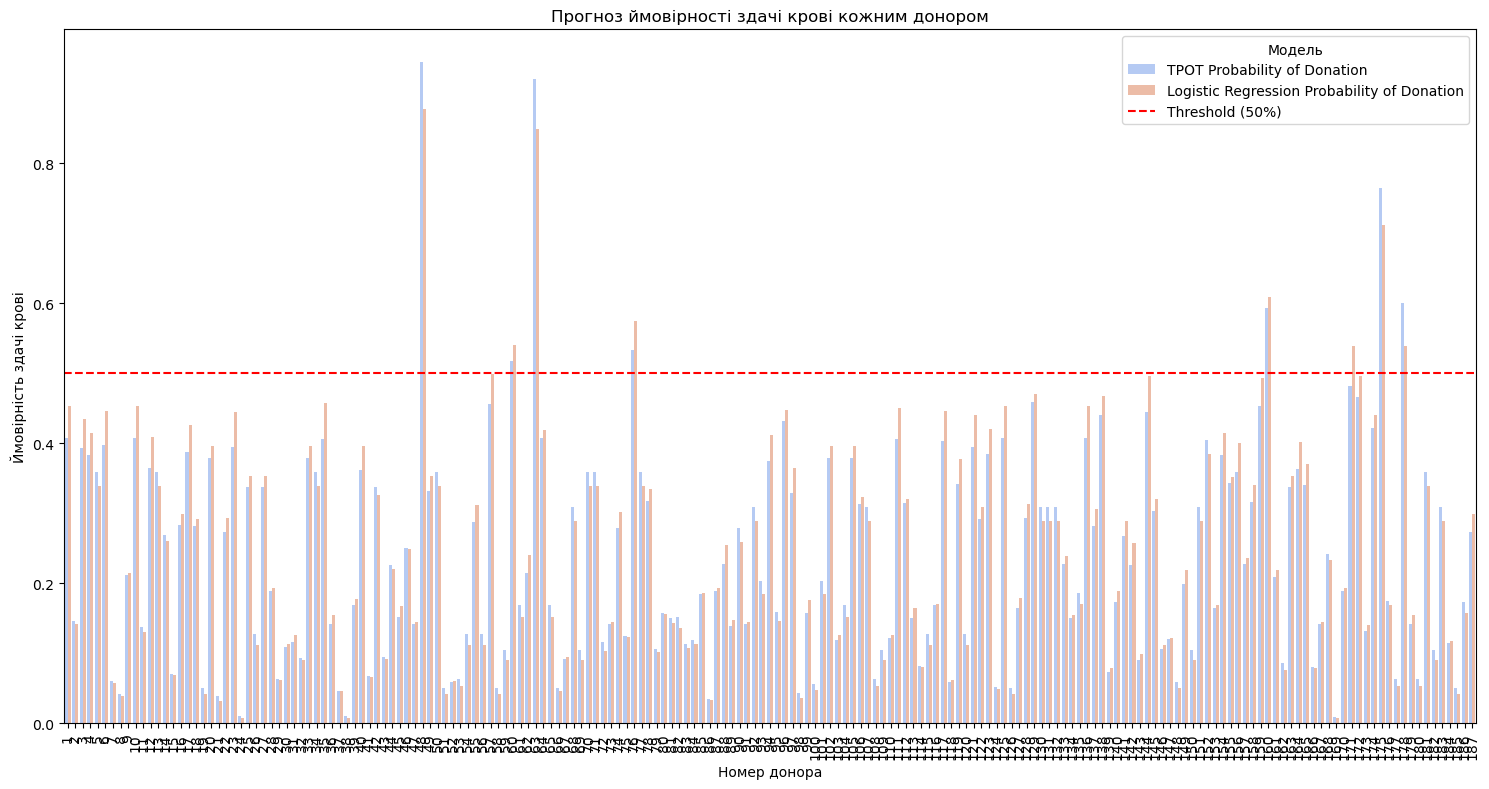

In [84]:
# Побудова графіку
plt.figure(figsize=(15, 8))
sns.barplot(data=predictions_df.melt(id_vars="Donor Number", 
                                     value_name="Probability", 
                                     var_name="Model"),
            x="Donor Number", y="Probability", hue="Model", palette="coolwarm")

# Додавання лінії порогу для візуального відображення ймовірності 50%
plt.axhline(0.5, color='red', linestyle='--', label="Threshold (50%)")

# Налаштування зовнішнього вигляду графіка
plt.title('Прогноз ймовірності здачі крові кожним донором')
plt.xlabel('Номер донора')
plt.ylabel('Ймовірність здачі крові')
plt.legend(title='Модель', loc='upper right')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

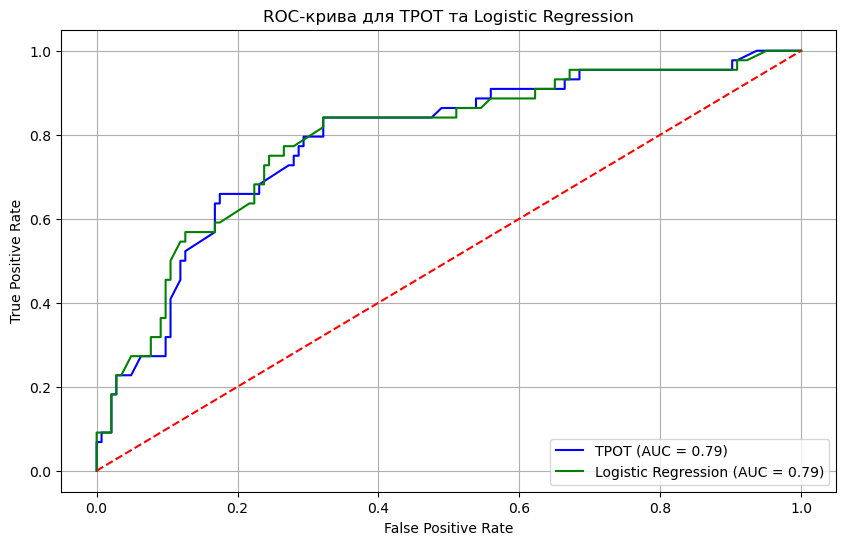

In [90]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Обчислення ROC-кривої та AUC для TPOT
fpr_tpot, tpr_tpot, _ = roc_curve(y_test, tpot.predict_proba(X_test)[:, 1])
roc_auc_tpot = auc(fpr_tpot, tpr_tpot)

# Обчислення ROC-кривої та AUC для Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg.predict_proba(X_test_normed)[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Побудова графіку ROC-кривих
plt.figure(figsize=(10, 6))
plt.plot(fpr_tpot, tpr_tpot, color='blue', label=f'TPOT (AUC = {roc_auc_tpot:.2f})')
plt.plot(fpr_logreg, tpr_logreg, color='green', label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')

# Діагональна лінія
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Налаштування графіку
plt.title('ROC-крива для TPOT та Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


<Axes: xlabel='Frequency (times)', ylabel='Recency (months)'>

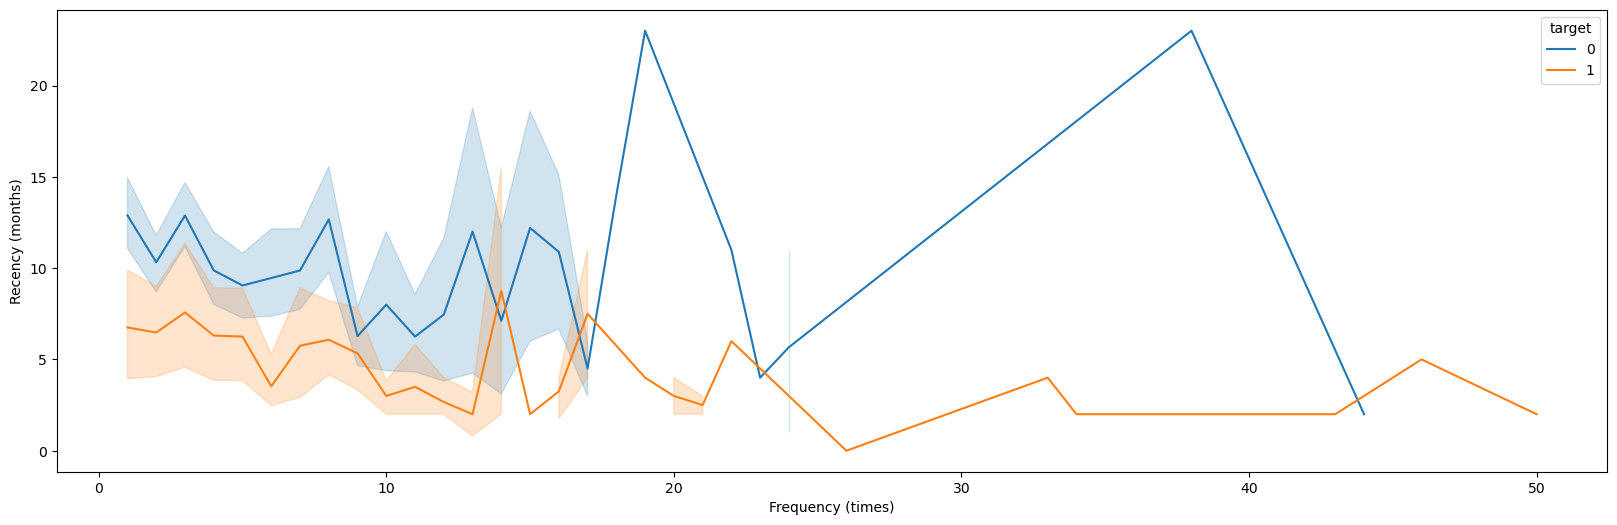

In [100]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Frequency (times)', y='Recency (months)', hue='target', data = transfusion)

<Axes: >

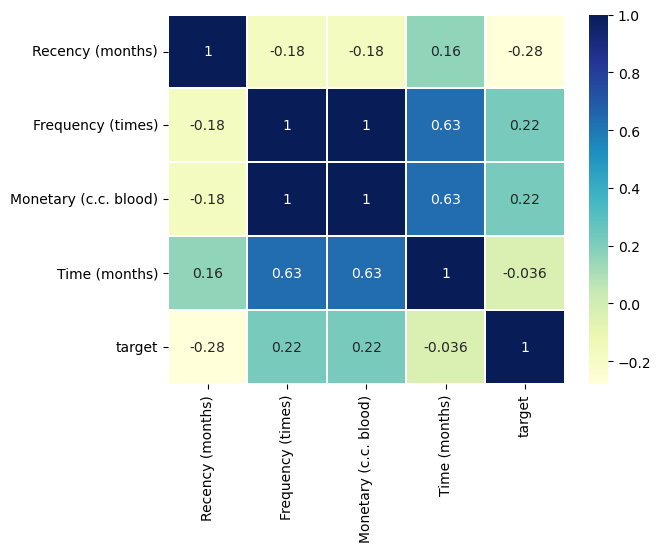

In [102]:
sns.heatmap(transfusion.corr(), annot=True, linewidths=0.3, cmap="YlGnBu")
